In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import gutplots as gp

%load_ext autoreload
%autoreload 2

###Preparing both expanded and original features dataframes to be compared within models.
#df contains Numerical Representation of Churn ('Churn1'), and only includes Region.

#Original df accidently includes AgeHH1 and AgeGroupHH1 and we have to remove the group
original = pd.read_csv('regression_df.csv', index_col=[0])
#df is now ready to be used with models
df= original.drop('AgeGroupHH1', axis = 1)


df2 = pd.read_csv('full_df.csv', index_col = [0])
#Df2 includes state, Customer Id, And both Churns ("Churn"= yes and no and "Churn1" = 1,0. 
#Df2 will be a good source for making changes during modelling.

#dropping 'Churn' (yes/no) and the other variables due to uniqueness/interference of correlation metrics.
df2_drops = ['CustomerID', 'Churn' ,'State'] 
#df2 that is now ready for correlation analysis
df2_corr = df2.drop(df2_drops, axis= 1)


print("df2_corr includes categorized number columns and number columns which may have redundancy and correction will likely be required.") 
for cols in df2_corr: #includes made category cols (_cat)
    print("- " + cols)

df2_corr includes categorized number columns and number columns which may have redundancy and correction will likely be required.
- Region
- MonthlyRevenue
- MonthlyMinutes
- TotalRecurringCharge
- DirectorAssistedCalls
- OverageMinutes
- RoamingCalls
- PercChangeMinutes
- PercChangeRevenues
- DroppedCalls
- BlockedCalls
- UnansweredCalls
- CustomerCareCalls
- ThreewayCalls
- ReceivedCalls
- OutboundCalls
- InboundCalls
- PeakCallsInOut
- OffPeakCallsInOut
- DroppedBlockedCalls
- CallForwardingCalls
- CallWaitingCalls
- MonthsInService
- Tenure_cat
- UniqueSubs
- ActiveSubs
- Handsets
- HandsetModels
- CurrentEquipmentDays
- AgeHH1
- ChildrenInHH
- HandsetRefurbished
- HandsetWebCapable
- TruckOwner
- RVOwner
- Homeownership
- BuysViaMailOrder
- RespondsToMailOffers
- OptOutMailings
- NonUSTravel
- OwnsComputer
- HasCreditCard
- RetentionCalls
- RetentionOffersAccepted
- NewCellphoneUser
- NotNewCellphoneUser
- ReferralsMadeBySubscriber
- IncomeGroup
- OwnsMotorcycle
- AdjustmentsToCre

In [6]:
#When finding the dummies, the Churn was taken out prior.
dummy_df2 = pd.get_dummies(df2_corr, drop_first = True)
#Using Original Dataframe for correlation
dummy_df1 = pd.get_dummies(df, drop_first = True)

In [7]:
#Improving Scaling and Required redundant drops after the first run:



### Correlation


In [8]:
#Running after necessary drops
churn_corr2 = dummy_df2.corr()
churn_corr1= dummy_df1.corr()

#Only showing Churn column correlation
churn_corr2 = churn_corr2.Churn1
churn_corr1 = churn_corr1.Churn1

#Setting filter to only display top correlations
churn_corr1 = churn_corr1[((churn_corr1 > .03)|(churn_corr1 < -.03))]
churn_corr2 = churn_corr2[((churn_corr2 > .03)|(churn_corr2 < -.03))]

#Improving Scaling and Required redundant drops after the first run:
post_drops = ['RetentionCalls', 'Churn1', 'Tenure_cat.1_less_than_2', 'Tenure_cat.1_less_than_1', 'Monthly_Charge_cat_low', 'Monthly_Charge_cat_veryhigh']
churn_corr2= churn_corr2.drop(post_drops, axis = 0)
churn_corr1= churn_corr1.drop('Churn1', axis =0)

KeyError: "['Monthly_Charge_cat_veryhigh'] not found in axis"

In [ ]:

churn_corr2= churn_corr2
churn_corr2.sort_values(ascending = False).plot(kind='barh', figsize = (10, 6), color = 'Navy')
plt.title('ALL Feature Correlation w/ Churn', fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 8, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 8)
plt.savefig('plotshots/correlation.png')
plt.tight_layout()


#### - We can see from left to right and Right to left what variables had the most correlation to Churn

#### - Based on previous visualizations and insights, we are now able to get some quantifial results relating to Current Equipment, Reacurring Charges, Web services, and Credit Ratings that support insights in the exploration phase. Surprisingly 

#### Tenure is showing to have significantly lower amounts of correlation and the tenure low category only came up in the expanded correlation. There was very little correlation of tenure in the original dataframe.


In [ ]:

dummy_df = pd.get_dummies(df, drop_first = True)

#When finding the correlation, the churn was put back in from regression df which is the numerical churn.
dummy_df['Churn'] = df['Churn1']
corr_df = dummy_df.corr()
churn_corr = corr_df.Churn 
churn_corr = churn_corr[((churn_corr > .03)|(churn_corr < -.03))]
churn_corr.filter(like = 'Tenure')
#CAn I only include some Tenure data in the model?
churn_corr.head(30)



#### We can see from left to right and Right to left what variables had the most correlation to Churn
#####  Based on previous visualizations and insights, we are now able to get some quantifial results relating to Current Equipment, Reacurring Charges, Web services, and Credit Ratings that support insights in the exploration phase. Surprisingly Tenure is showing to have significantly lower amounts of correlation. 

## Logistic Regression

In [9]:
#logistic regression
dummy_df1.head(3)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes,CreditRating_split_High,CreditRating_split_Highest,CreditRating_split_Low,CreditRating_split_Lowest,CreditRating_split_Medium,CreditRating_split_VeryLow
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,0,0,0,1,0,0,0,0
1,53.69,144.0,50.0,0.00,0.0,0.0,72.0,-0.4,0.7,0.0,...,0,0,1,0,0,1,0,0,0,0
2,74.37,585.0,81.0,0.99,0.0,0.0,77.0,-34.8,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:

filt = ['MonthsInService','CurrentEquipmentDays','MonthlyRevenue', 'MonthlyMinutes','HandsetPrice_100',
    'HandsetPrice_130', 'HandsetPrice_150',
    'HandsetPrice_200','HandsetPrice_250',
    'HandsetPrice_30', 'HandsetPrice_40',
    'HandsetPrice_60','HandsetPrice_Unknown',
    'HandsetPrice_80', 'HandsetWebCapable_Yes','HandsetRefurbished_Yes', 'MadeCallToRetentionTeam_Yes',
    'TotalRecurringCharge',
    'CreditRating_split_High','CreditRating_split_Low',
    'CreditRating_split_Medium',
    'MaritalStatus_Unknown',
    'MaritalStatus_Yes','Occupation_Student', 'AgeGroupHH1_senior',
    'AgeGroupHH1_young', 'Occupation_Other', 'Occupation_Professional', 'Region_Mountain','DroppedCalls','PrizmCode_Rural', 
    'PrizmCode_Town']
        

target = dummy_df1['Churn1']
#This Logistic Regression is based on the expanded dataframe. 
x=dummy_df2[filt]
# x = dummy_df1


model  = sm.OLS(target,x ).fit()
print(model.summary())    

#NOT USED Features for df2:        
#         'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
#        'PercChangeMinutes', 
#        'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
#        'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
#         'DroppedBlockedCalls', 'CallForwardingCalls',
#        'CallWaitingCalls', 'UniqueSubs', 'ActiveSubs',
#        'Handsets', 'HandsetModels',  'AgeHH1',
#        'RetentionCalls', 'RetentionOffersAccepted',
#         'IncomeGroup', 'AdjustmentsToCreditRating',
#        'Churn1', 'Region_East South Central', 'Region_Middle Atlantic',
#        'Region_Mountain', 'Region_New England', 'Region_Pacific',
#        'Region_South Atlantic', 'Region_West North Central',
#        'Region_West South Central', 'ChildrenInHH_Yes',
#          'TruckOwner_Yes',
#        'RVOwner_Yes', 'Homeownership_Unknown', 'BuysViaMailOrder_Yes',
#        'RespondsToMailOffers_Yes', 'OptOutMailings_Yes', 'NonUSTravel_Yes',
#        'OwnsComputer_Yes', 'HasCreditCard_Yes', 'NewCellphoneUser_Yes',
#        'NotNewCellphoneUser_Yes', 'OwnsMotorcycle_Yes', 
#         'PrizmCode_Rural', 'PrizmCode_Suburban',
#        'PrizmCode_Town',  ]




                                 OLS Regression Results                                
Dep. Variable:                 Churn1   R-squared (uncentered):                   0.303
Model:                            OLS   Adj. R-squared (uncentered):              0.302
Method:                 Least Squares   F-statistic:                              675.3
Date:                Tue, 11 Aug 2020   Prob (F-statistic):                        0.00
Time:                        11:54:39   Log-Likelihood:                         -30507.
No. Observations:               49752   AIC:                                  6.108e+04
Df Residuals:                   49720   BIC:                                  6.136e+04
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

### Upon running a logistic regression with pvalues within optimal range, there is a wide variance in its ability to be able to give an accurate yes or no prediction to churn and the low r-squared of .30 emphasizes it weak ability to do so.

## Decision Tree

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
#dependent variable
y = df['Churn1']

#independent variables (dummy_df1 does not have y variable in it)
x = dummy_df1
filt = ['MonthsInService','CurrentEquipmentDays','MonthlyRevenue', 'MonthlyMinutes','HandsetPrice_100',
    'HandsetPrice_130', 'HandsetPrice_150',
    'HandsetPrice_200','HandsetPrice_250',
    'HandsetPrice_30', 'HandsetPrice_40',
    'HandsetPrice_60','HandsetPrice_Unknown',
    'HandsetPrice_80', 'HandsetWebCapable_Yes','HandsetRefurbished_Yes', 'MadeCallToRetentionTeam_Yes',
    'TotalRecurringCharge',
    'CreditRating_split_High','CreditRating_split_Low',
    'CreditRating_split_Medium',
    'MaritalStatus_Unknown',
    'MaritalStatus_Yes','Occupation_Student',
    'Occupation_Other', 'Occupation_Professional', 'Region_Mountain','DroppedCalls','PrizmCode_Rural', 
    'PrizmCode_Town']
x= dummy_df1[filt]

#40 percent of the data is randomly selected and assigned to the test data portion. 
#Random State ensures test and train data set remain same on each run.


x_train, x_test, y_train, y_test = train_test_split(x , y,test_size = .4, random_state=30)

model = RandomForestClassifier(n_estimators= 30, random_state = 30)

model.fit(x_train, y_train)

prediction_test = model.predict(x_test)

from sklearn import metrics

print("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

print(prediction_test)


Accuracy =  0.7039847243857092
[0 0 1 ... 0 0 0]


In [62]:
from sklearn.metrics import confusion_matrix


conf_mat = confusion_matrix(y_test , prediction_test)
print('original= ' + str(conf_mat))
# print(conf_mat)
new_conf = [[762,5016],[875, 13248]]
new_conf= np.array(new_conf)
print('new=' + str(new_conf))

original= [[13248   875]
 [ 5016   762]]
new=       [[  762  5016]
 [  875 13248]]


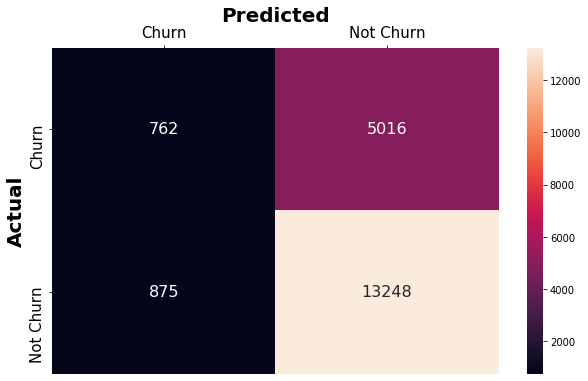

In [55]:
fig = plt.figure(figsize = (10, 6))
ax= plt.subplot()
sns.heatmap(new_conf, annot=True,annot_kws={"size":16},ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20, weight = 'bold')
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Churn', 'Not Churn'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=20, weight= 'bold')
ax.yaxis.set_ticklabels(['Churn', 'Not Churn'], fontsize = 15)
plt.show()


fig.savefig('plotshots/confusion_matrix.png')

Even tho in the context of the dataset, churn is not the result that is desired, the churn is a  minority result on an imbalanced dataset.

- Top Left is True Positive. It predicted Churn and it was actually Churn. (Correct Prediction)
- Top Right Predicted NotChurn, but it was Actually Churn. (Incorrect Prediction)
- Bottom Right, It predicted not Churn and it was Actually not churn. (Correct Prediction)
- Bottom Left: It predected Churn but it was actually Not Churn (Incorrect Prediction)

If we want to calculate accuracy: All correct/ (SUM of Predictions whetyher they be rigth or wrong.)

If we want to calculate Precision: True Positive(TopLeft- the one that we are most trying to predict)/ (All of its attempts to make that prediction- in this case all Churn predictions)

If we want to calculate Recall:  True Positives/ all of the incorrect predictions
Recall hows a strong representation of the model’s low probability to acutely predict Churned customers as it was correct 13.2% of the time out of all times it had the opportunity to make a correct churn prediction. 




In [63]:
'HeLLo'.lower()

'hello'